In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import geopandas as gpd

players_df = pd.read_feather('../cleaned_data/players.feather')
val_df = pd.read_feather('../cleaned_data/players_valuation.feather')
appearances_df = pd.read_feather('../cleaned_data/appearances.feather')
lineups_df = pd.read_feather('../cleaned_data/game_lineups.feather')

# Players Stats

Visualizzazioni relative alle statistiche dei giocatori:
- statistiche generali (giocatori in attività)
- statistiche individuali
- altre statistiche e visualizzazioni

## Statistiche generali Giocatori

Statistiche e visualizzazioni su tutti i giocatori attuali per quanto riguarda argomenti come ad esempio il piede preferito o i valori di mercato. 

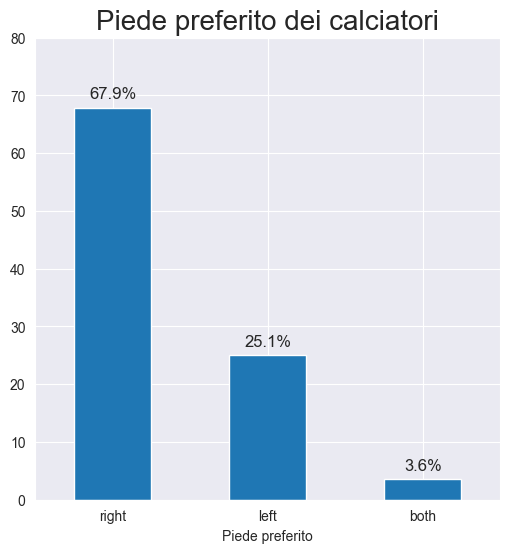

In [2]:
# piede preferito dei calciatori

foot_count = players_df['foot'].value_counts()
foot_percentage = (foot_count / len(players_df))*100

plt.figure(figsize=(6,6))
ax = foot_percentage.plot(kind='bar')

for i, v in enumerate(foot_percentage):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=12)

plt.title("Piede preferito dei calciatori", fontsize=20)
plt.ylim(0,80)
plt.ylabel('')
plt.xlabel('Piede preferito')
plt.xticks(rotation=0)
plt.show()

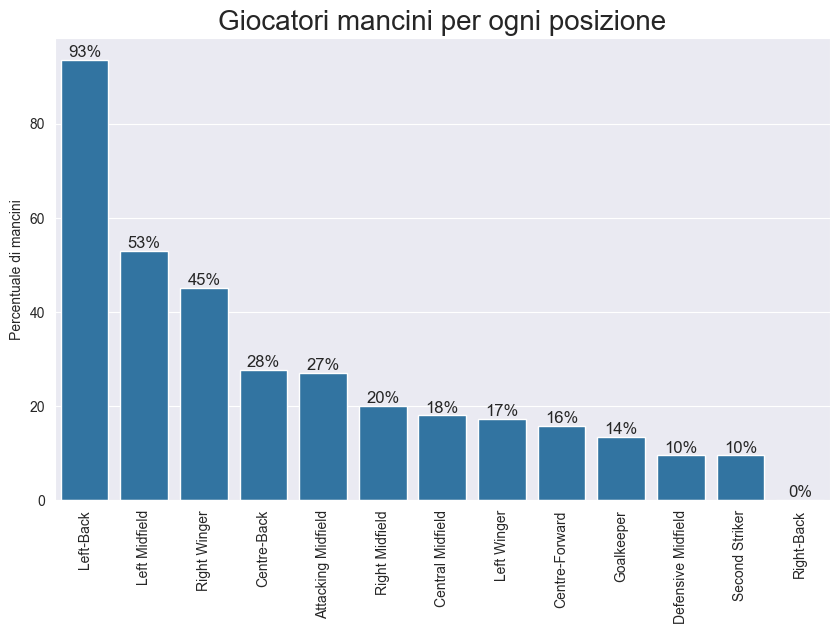

In [3]:
# distribuzione dei giocatori mancini nelle diverse posizioni

left_footed_players = players_df.query('foot == "left"')

total_players_by_position = players_df.groupby('sub_position').size()
left_footed_players_by_position = left_footed_players.groupby('sub_position').size()

left_percentage = ((left_footed_players_by_position / total_players_by_position)*100).fillna(0).round(decimals=2)

left_foot_df = (pd.DataFrame({'sub_position': left_percentage.index, 'left_percentage': left_percentage.values}).
                sort_values(by='left_percentage', ascending=False))


plt.figure(figsize=(10,6))
sns.barplot(data=left_foot_df, x='sub_position', y='left_percentage') 

counter = 0
for index, row in left_foot_df.iterrows():
    plt.text(counter, row['left_percentage'], f'{row["left_percentage"]:.0f}%', ha='center', va='bottom', fontsize=12)
    counter += 1

plt.xticks(rotation=90)
plt.title("Giocatori mancini per ogni posizione", fontsize=20)
plt.xlabel("")
plt.ylabel("Percentuale di mancini")
plt.show()

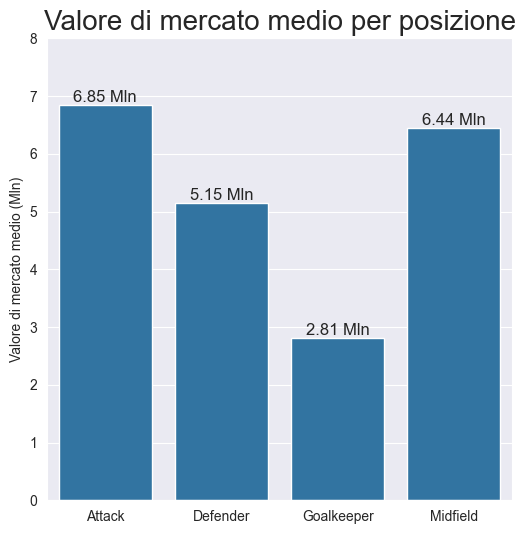

In [4]:
# valore di mercato per ogni posizione

# VDM medio per posizione
avg_vdm_by_position = players_df.dropna().groupby('position')['market_value_mln'].mean().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data=avg_vdm_by_position, x='position', y='market_value_mln')
    
counter = 0
for index, row in avg_vdm_by_position.iterrows():
    plt.text(counter, row['market_value_mln'], f'{row["market_value_mln"]:.2f} Mln', ha='center', va='bottom', fontsize=12)
    counter += 1

plt.title('Valore di mercato medio per posizione', fontsize=20)
plt.xlabel('')
plt.ylabel('Valore di mercato medio (Mln)')
plt.xticks(rotation=0)
plt.ylim(0,8)
plt.show()

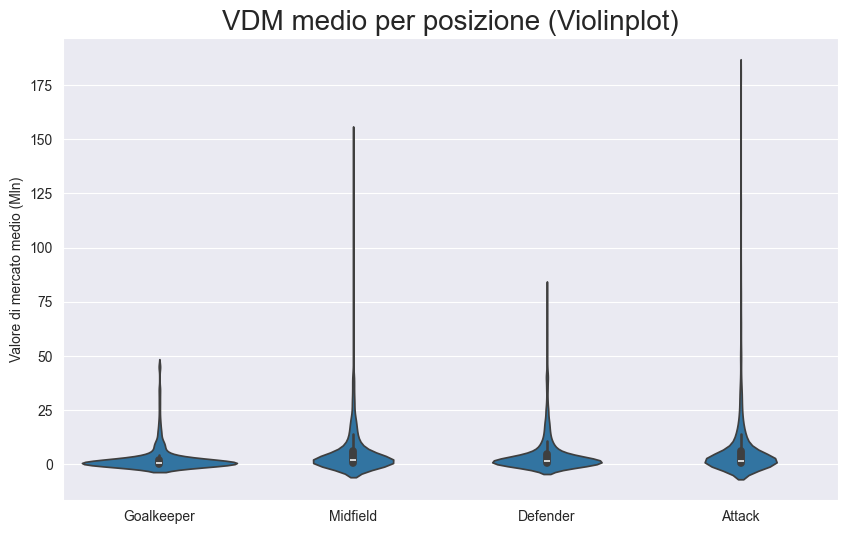

In [5]:
# valore di mercato medio per posizione (Violinplot)

plt.figure(figsize=(10,6))
sns.violinplot(data=players_df.dropna(), x='position', y='market_value_mln')

plt.title('VDM medio per posizione (Violinplot)', fontsize=20)
plt.xlabel('')
plt.ylabel('Valore di mercato medio (Mln)')
plt.show()

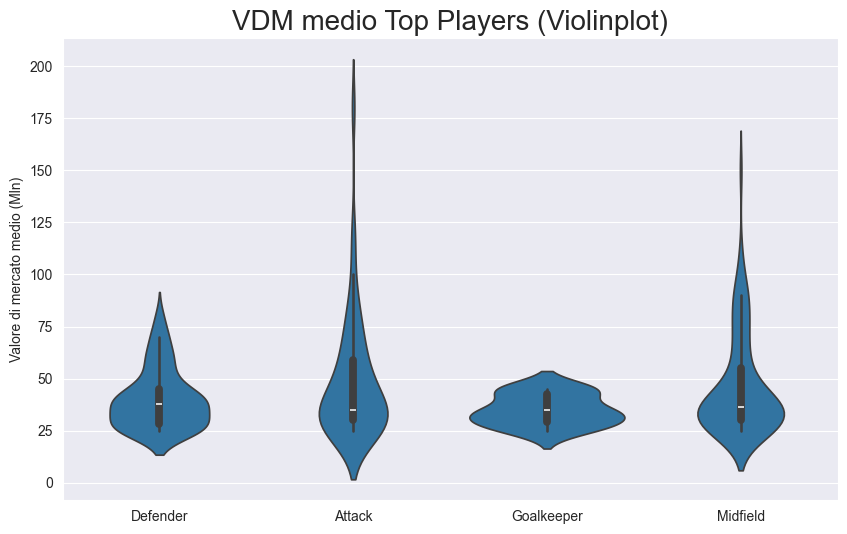

In [6]:
# valore di mercato medio per posizione (Violinplot) dei TopPlayers

top_players = players_df.dropna().query('market_value_mln >= 25')

plt.figure(figsize=(10,6))
sns.violinplot(data=top_players, x='position', y='market_value_mln')

plt.title('VDM medio Top Players (Violinplot)', fontsize=20)
plt.xlabel('')
plt.ylabel('Valore di mercato medio (Mln)')
plt.show()

In [7]:
starting_players = lineups_df.query('is_starting == True')
unique_players = starting_players.drop_duplicates('player_id')
numbers = unique_players['shirt_number'].value_counts()

In [8]:
# numero di maglia più usato per ogni posizione

top_numbers_by_position = starting_players.groupby('sub_position')['shirt_number'].agg(pd.Series.mode)

top_numbers_by_position

sub_position
Attacking Midfield    10
Central Midfield       8
Centre-Back            4
Centre-Forward         9
Defensive Midfield     6
Goalkeeper             1
Left Midfield          3
Left Winger            7
Left-Back              3
Right Midfield         2
Right Winger           7
Right-Back             2
Second Striker        10
Name: shirt_number, dtype: Int64

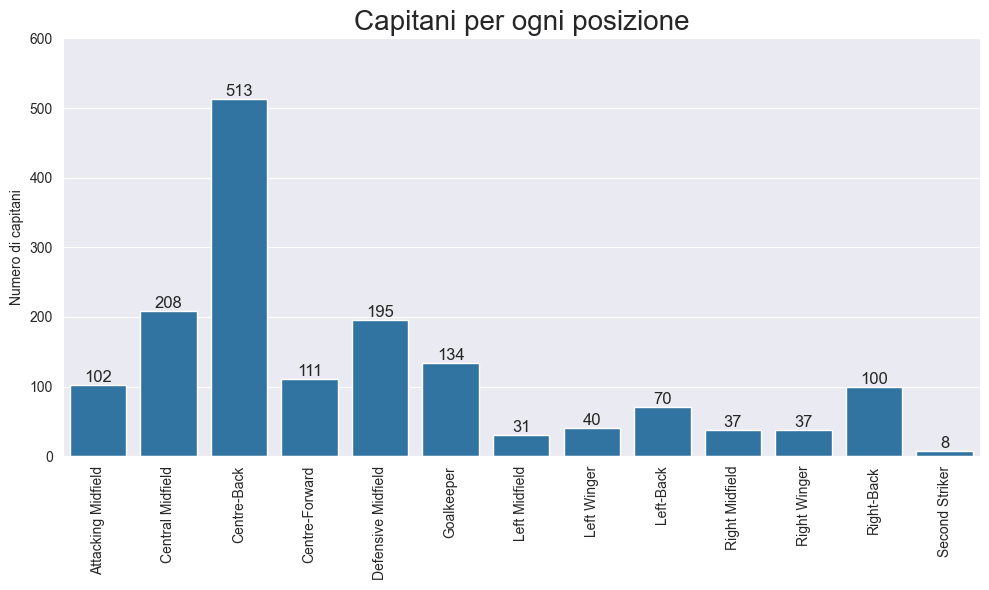

In [9]:
# posizioni con il maggior numero di capitani

captains = starting_players.query("is_captain == True")

# Rimuovi i duplicati perchè essendo il df delle formazioni ci sono più volte gli stessi giocatori
unique_captains = captains.drop_duplicates('player_id')

captains_count = unique_captains.groupby('sub_position').size().reset_index(name='count')


plt.figure(figsize=(10,6))
ax = sns.barplot(data=captains_count, x='sub_position', y='count')

for index, row in captains_count.iterrows():
    ax.annotate(row['count'], xy=(index, row['count']), ha='center', va='bottom', fontsize=12)

plt.title('Capitani per ogni posizione', fontsize=20)
plt.xlabel('')
plt.ylabel('Numero di capitani')
plt.xticks(rotation=90)
plt.ylim(0,600)
plt.tight_layout()
plt.show()

In [10]:
# uniamo i giocatori perchè nel dataframe delle aree geografiche c'è il Regno Unito e non le singole nazionali

players_df_uk = players_df.copy()

uk_nationalities = ["England", "Scotland", "Wales", "Northern Ireland"]
players_df_uk['nationality'] = players_df_uk['nationality'].replace(uk_nationalities, "United Kingdom")

players_df_uk.query('nationality == "United Kingdom"').head(10)

,first_name,last_name,full_name,last_season,club_id,player_code,country_of_birth,city_of_birth,nationality,date_of_birth,...,highest_market_value_in_eur,image_url,player_profile_url,league_id,club_name,height_in_m,market_value_mln,highest_market_value_mln,age,shirt_number
player_id,,,,,,,,,,,,,,,,,,,,,
40204,Joe,Hart,Joe Hart,2023,371,joe-hart,England,Shrewsbury,United Kingdom,1987-04-19,...,24000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/joe-hart/profi...,SC1,Celtic FC,1.96,1.500,24.00,37,1
43858,Adam,Legzdins,Adam Legzdins,2023,511,adam-legzdins,England,Penkridge,United Kingdom,1986-11-28,...,500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adam-legzdins/...,SC1,Dundee FC,1.90,0.150,0.50,37,1
46106,Adam,Le Fondre,Adam Le Fondre,2023,903,adam-le-fondre,England,Stockport,United Kingdom,1986-12-02,...,4000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adam-le-fondre...,SC1,Hibernian FC,1.80,0.400,4.00,37,19
79620,Ali,Crawford,Ali Crawford,2023,2578,ali-crawford,Scotland,Lanark,United Kingdom,1991-07-30,...,800000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ali-crawford/p...,SC1,St. Johnstone FC,1.79,0.350,0.80,32,None
85177,Nathaniel,Clyne,Nathaniel Clyne,2023,873,nathaniel-clyne,England,London,United Kingdom,1991-04-05,...,21000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nathaniel-clyn...,GB1,Crystal Palace,1.75,2.000,21.00,33,17
173192,Mikey,Devlin,Mikey Devlin,2023,1241,mikey-devlin,Scotland,Motherwell,United Kingdom,1993-10-03,...,600000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mikey-devlin/p...,SC1,Livingston FC,1.88,0.300,0.60,30,5
216270,Ricki,Lamie,Ricki Lamie,2023,511,ricki-lamie,Scotland,Shotts,United Kingdom,1993-06-20,...,400000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ricki-lamie/pr...,SC1,Dundee FC,1.85,0.375,0.40,31,4
226151,Sean,Kelly,Sean Kelly,2023,1241,sean-kelly,Scotland,Glasgow,United Kingdom,1993-11-01,...,400000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sean-kelly/pro...,SC1,Livingston FC,1.88,0.400,0.40,30,24
238029,Liam,Gordon,Liam Gordon,2023,2578,liam-gordon,Scotland,Perth,United Kingdom,1996-01-26,...,550000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/liam-gordon/pr...,SC1,St. Johnstone FC,1.83,0.500,0.55,28,6


In [11]:
world = gpd.read_file('../geographic_data/ne_110m_admin_0_countries.shp')
europe = world.query('CONTINENT == "Europe"')

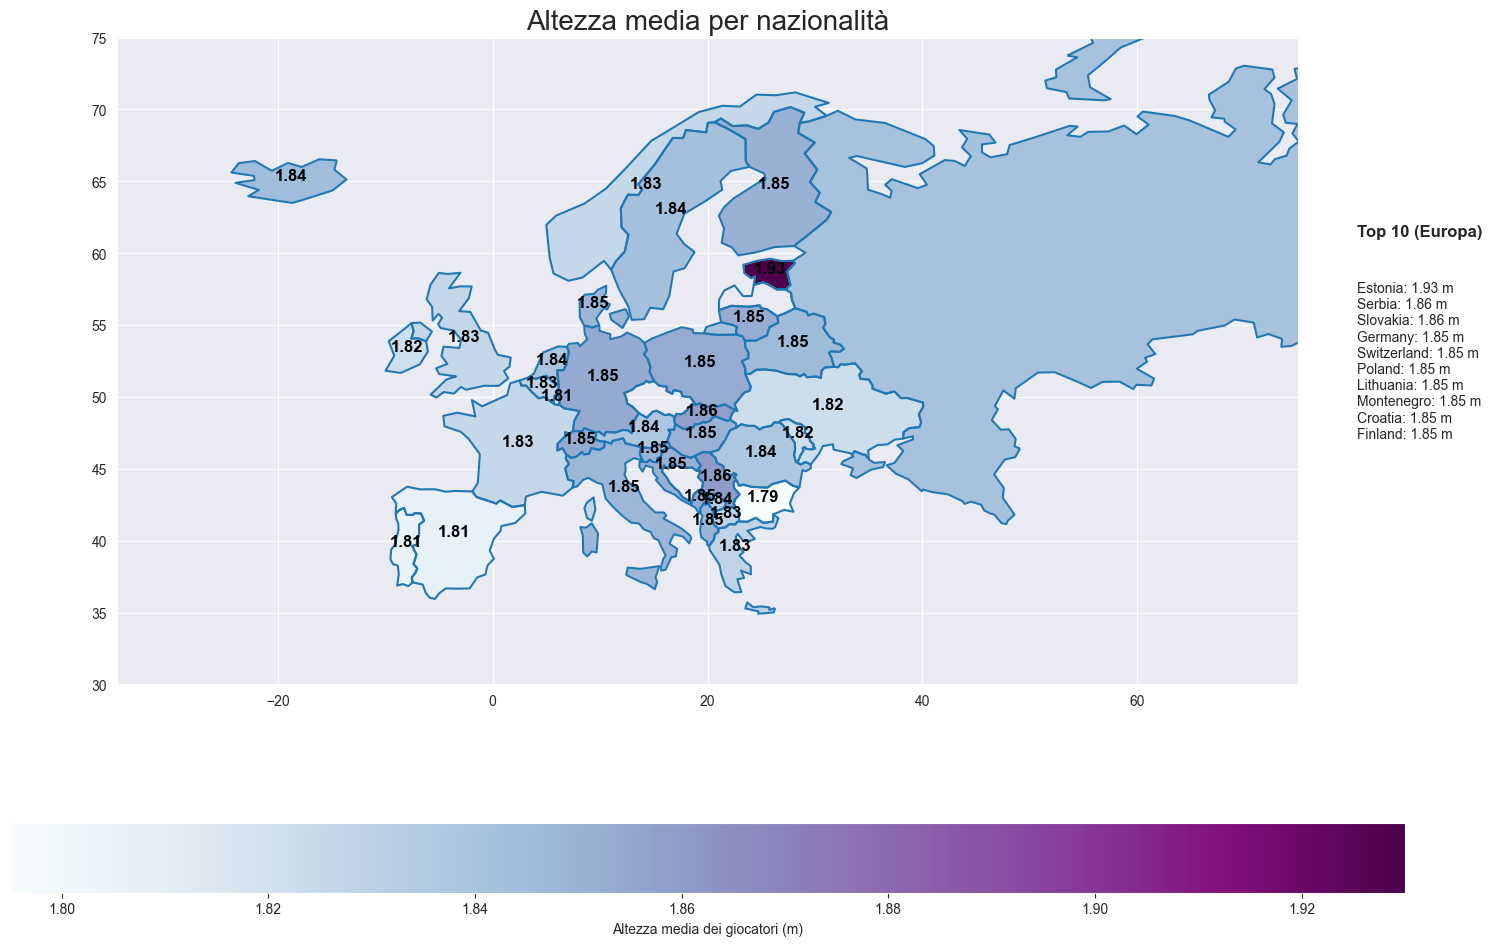

In [12]:
# altezza media dei giocatori per nazionalità (Europa)

heights = players_df_uk.groupby('nationality')['height_in_m'].mean().reset_index()
heights = heights.sort_values(by='height_in_m', ascending=False)
heights.columns = ['nationality', 'avg_height']

nations_heights = europe.merge(heights, left_on='NAME', right_on='nationality', how='left')
top10_heights = nations_heights[['nationality', 'avg_height']].nlargest(10, 'avg_height')

fig, ax = plt.subplots(1, 1, figsize=(18, 12))
nations_heights.boundary.plot(ax=ax)
nations_heights.plot(column='avg_height',
           ax=ax,
           cmap='BuPu',
           legend=True,
           legend_kwds={'label': "Altezza media dei giocatori (m)",
                        'orientation': "horizontal"})

# Annotations: code by ChatGPT
for idx, row in nations_heights.iterrows():
    if row['avg_height'] > 1:
        if row['geometry'].geom_type == 'MultiPolygon':
            main_polygon = max(row['geometry'].geoms, key=lambda a: a.area)
            centroid = main_polygon.centroid
        else:
            centroid = row['geometry'].centroid
    
        plt.annotate(text=f"{row['avg_height']:.2f}",
                 xy=(centroid.x, centroid.y),
                 horizontalalignment='center',
                 fontsize=12, weight='bold', color='black')

# Top10 Legend: code by ChatGPT
legend_title = "Top 10 (Europa)"
legend_text = '\n'.join([f'{row.nationality}: {row["avg_height"]:.2f} m' for _, row in top10_heights.iterrows()])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(1.05, 0.7, legend_title, transform=ax.transAxes, fontsize=12, weight='bold',
        verticalalignment='center', bbox=props)
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='center', bbox=props)

# Limiti di latitudine e longitudine per l'Europa
ax.set_xlim(-35, 75)
ax.set_ylim(30, 75)

plt.title('Altezza media per nazionalità', fontsize=20)
plt.show()

## Statistiche individuali Giocatori

Statistiche individuali dei migliori giocatori( attuali oppure a partire dal 2012) per quanto riguarda statistiche e prestazioni individuali come goal, assist, presenze, minuti giocati...

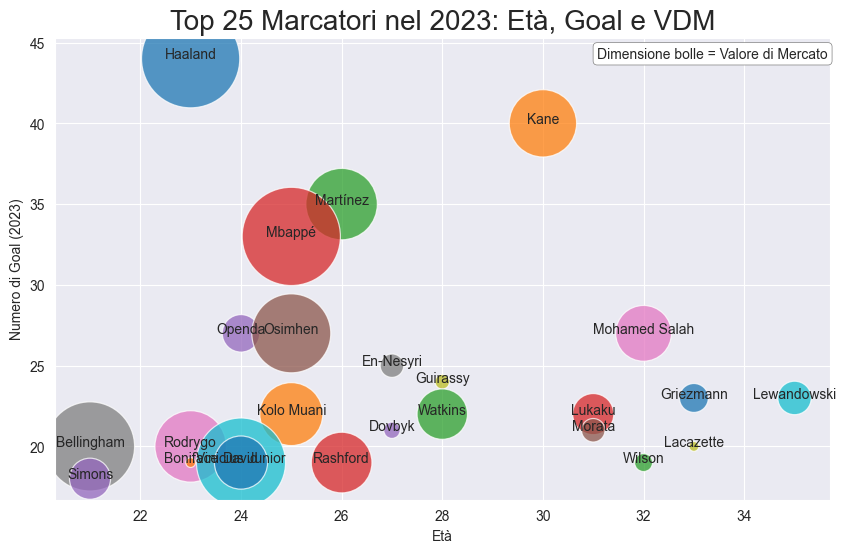

In [13]:
# migliori marcatori 2023

top_leagues = ["IT1", "ES1", "L1", "GB1", "FR1"]
top_players = players_df.query('league_id in @top_leagues').sort_values(by='market_value_mln', ascending=False)
appearances_2023 = appearances_df.query('date >= 2023')

top_players_goals_2023 = pd.merge(top_players, appearances_2023, how='inner', on='player_id')
top_players_goals_sum = top_players_goals_2023.groupby(['player_id', 'last_name', 'age', 'market_value_mln', 'club_name']).agg({'goals': 'sum'}).reset_index()
top25_goalscorers = top_players_goals_sum.sort_values(by='goals', ascending=False).head(25)

plt.figure(figsize=(10, 6))
bubble_chart = sns.scatterplot(
    data=top25_goalscorers, 
    x='age', 
    y='goals', 
    size='market_value_mln', 
    hue='last_name', 
    sizes=(50, 5000), 
    legend=False, 
    palette='tab10',
    alpha=0.75
)


for i in range(top25_goalscorers.shape[0]):
    plt.text(
        top25_goalscorers['age'].iloc[i], 
        top25_goalscorers['goals'].iloc[i], 
        top25_goalscorers['last_name'].iloc[i], 
        fontsize=10, 
        ha='center'
    )

plt.title('Top 25 Marcatori nel 2023: Età, Goal e VDM', fontsize=20)
plt.xlabel('Età')
plt.ylabel('Numero di Goal (2023)')
plt.grid(True)

# Aggiunge label per la dimensione delle bolle
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
plt.text(0.7, 0.95, "Dimensione bolle = Valore di Mercato", ha='left', va='bottom',
         fontsize=10, transform=plt.gca().transAxes, bbox=bbox_props)

plt.show()

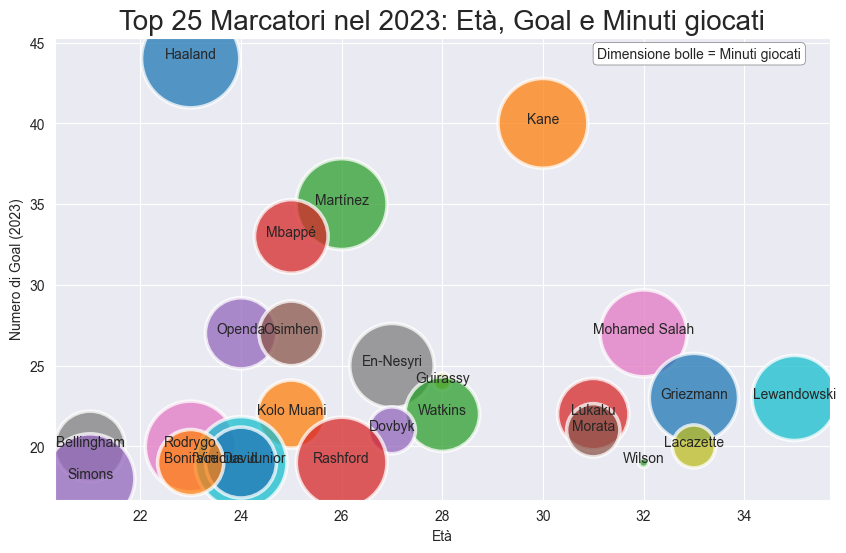

In [14]:
# migliori marcatori 2023

top_leagues = ["IT1", "ES1", "L1", "GB1", "FR1"]
top_players = players_df.query('league_id in @top_leagues').sort_values(by='market_value_mln', ascending=False)
appearances_2023 = appearances_df.query('date >= 2023')

top_players_goals_2023 = pd.merge(top_players, appearances_2023, how='inner', on='player_id')
top_players_goals_sum = top_players_goals_2023.groupby(['player_id', 'last_name', 'age', 'market_value_mln', 'club_name']).agg({'goals': 'sum', 'minutes_played': 'sum'}).reset_index()
top25_goalscorers = top_players_goals_sum.sort_values(by='goals', ascending=False).head(25)

plt.figure(figsize=(10, 6))
bubble_chart = sns.scatterplot(
    data=top25_goalscorers, 
    x='age', 
    y='goals', 
    size='minutes_played', 
    hue='last_name', 
    sizes=(50, 5000), 
    legend=False, 
    palette='tab10',
    alpha=0.75
)


for i in range(top25_goalscorers.shape[0]):
    plt.text(
        top25_goalscorers['age'].iloc[i], 
        top25_goalscorers['goals'].iloc[i], 
        top25_goalscorers['last_name'].iloc[i], 
        fontsize=10, 
        ha='center'
    )

plt.title('Top 25 Marcatori nel 2023: Età, Goal e Minuti giocati', fontsize=20)
plt.xlabel('Età')
plt.ylabel('Numero di Goal (2023)')
plt.grid(True)

# Aggiunge label per la dimensione delle bolle
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
plt.text(0.7, 0.95, "Dimensione bolle = Minuti giocati", ha='left', va='bottom',
         fontsize=10, transform=plt.gca().transAxes, bbox=bbox_props)

plt.show()

In [15]:
# importiamo di nuovo i dati per comprendere tutti i giocatori dal 2012 (players_df conteneva solo quelli ancora in attività)
from config import folder_path
appearances_df = pd.read_csv(f"{folder_path}/appearances.csv")
players_df = pd.read_csv(f"{folder_path}/players.csv")

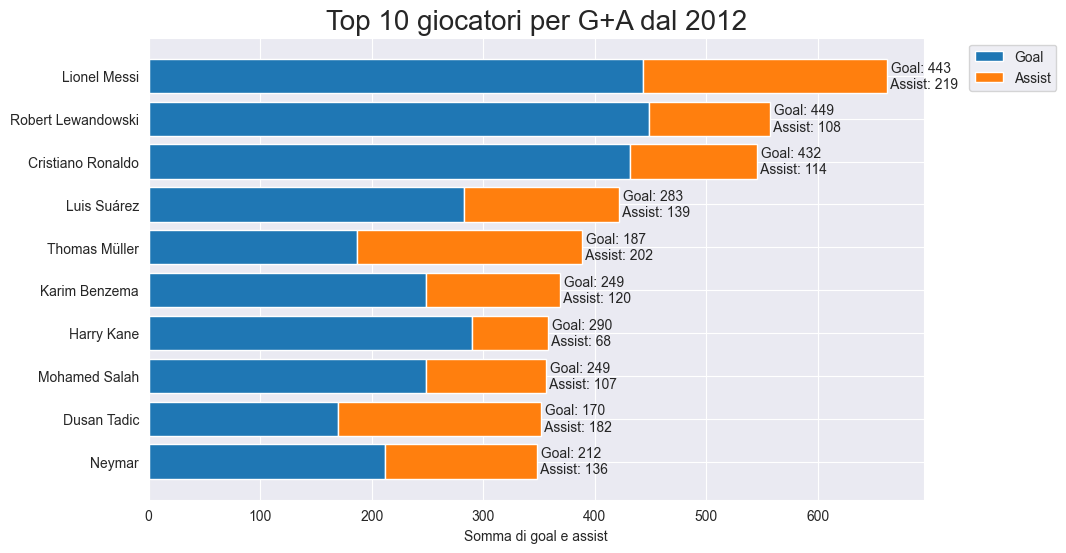

In [16]:
# migliori giocatori per goal e assist dal 2012

total_goals_assists = appearances_df.groupby('player_id')[['goals', 'assists']].sum()

merged_data = pd.merge(total_goals_assists, players_df, left_index=True, right_on='player_id')
merged_data['total_goals_assists'] = merged_data['goals'] + merged_data['assists']
top_players = merged_data.nlargest(10, 'total_goals_assists').sort_values(by='total_goals_assists')

plt.figure(figsize=(10, 6))
plt.barh(top_players['name'], top_players['goals'], label='Goal')
plt.barh(top_players['name'], top_players['assists'], left=top_players['goals'], label='Assist')

for i, (goals, assists, name) in enumerate(zip(top_players['goals'], top_players['assists'], top_players['name'])):
    plt.text(goals + assists, i, f' Goal: {goals}\n Assist: {assists}', va='center')

plt.title('Top 10 giocatori per G+A dal 2012', fontsize=20)
plt.xlabel('Somma di goal e assist')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

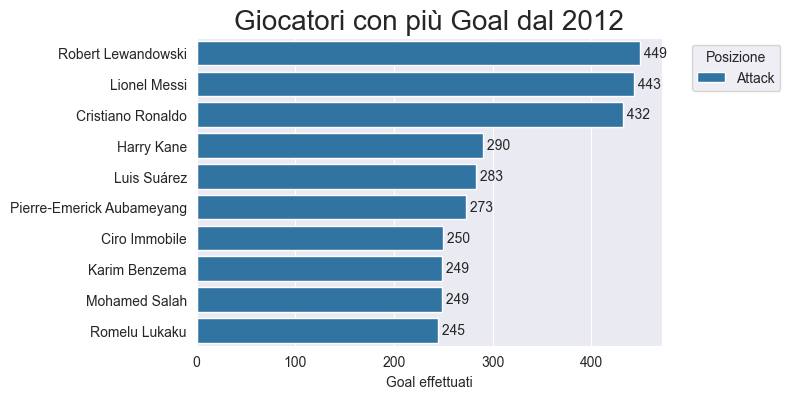

In [17]:
# giocatori con più goal segnati (dal 2012)

total_goals = appearances_df.groupby('player_id')['goals'].sum()

merged_data = pd.merge(total_goals, players_df, left_index=True, right_on='player_id')

top20_players_goals = merged_data.nlargest(10, 'goals')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=top20_players_goals, x='goals', y='name', hue='position')

for i, (value, name) in enumerate(zip(top20_players_goals['goals'], top20_players_goals['name'])):
    ax.text(value, i, f" {value}", ha="left", va='center')

plt.title('Giocatori con più Goal dal 2012', fontsize=20)
plt.ylabel('')
plt.xlabel('Goal effettuati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

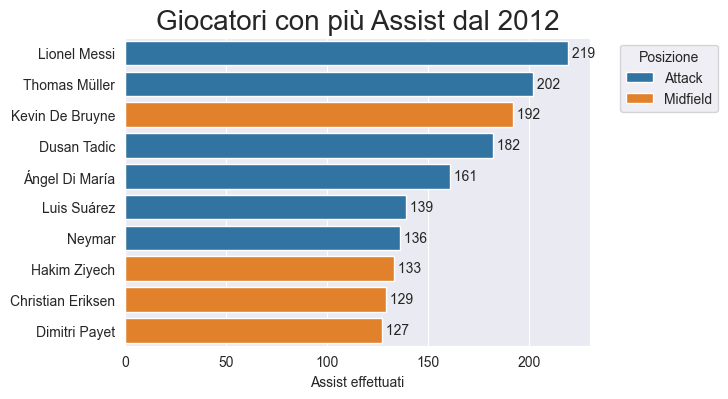

In [18]:
# giocatori con più assist effettuati dal 2012

total_assists = appearances_df.groupby('player_id')['assists'].sum()

merged_data = pd.merge(total_assists, players_df, left_index=True, right_on='player_id')

top20_players_assists = merged_data.nlargest(10, 'assists')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=top20_players_assists, x='assists', y='name', hue='position')

for i, (value, name) in enumerate(zip(top20_players_assists['assists'], top20_players_assists['name'])):
    ax.text(value, i, f" {value}", ha="left", va='center')

plt.title('Giocatori con più Assist dal 2012', fontsize=20)
plt.ylabel('')
plt.xlabel('Assist effettuati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

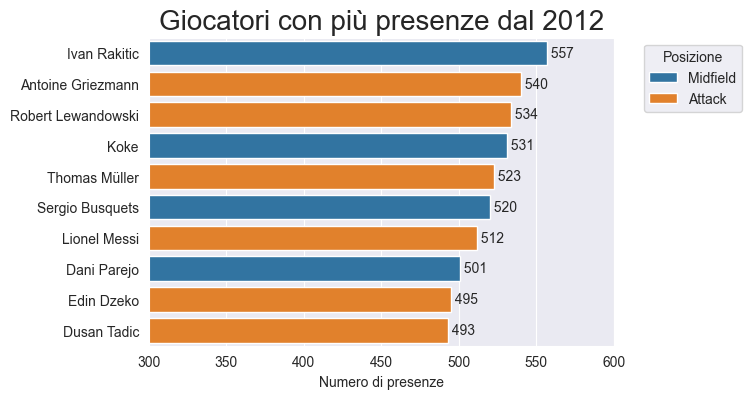

In [19]:
# giocatori con il maggior numero di presenze (dal 2012)

top_players_app = appearances_df['player_id'].value_counts().head(10)
merged_df = pd.merge(top_players_app, players_df, left_index=True, right_on='player_id')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=merged_df, y='name', x='count', hue='position')
    
for i, (value, name) in enumerate(zip(merged_df['count'], merged_df['name'])):
    ax.text(value, i, f" {value}", ha="left", va='center')

plt.title('Giocatori con più presenze dal 2012', fontsize=20)
plt.xlabel('Numero di presenze')
plt.ylabel('')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(300, 600)
plt.show()

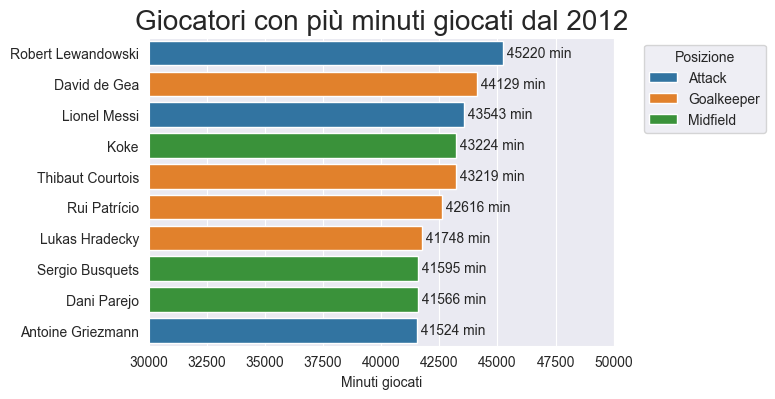

In [20]:
# giocatori con più minuti giocati (dal 2012)

total_minutes = appearances_df.groupby('player_id')['minutes_played'].sum()

merged_data = pd.merge(total_minutes, players_df, left_index=True, right_on='player_id')

top_players_minutes = merged_data.nlargest(10, 'minutes_played')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=top_players_minutes, x='minutes_played', y='name', hue='position')

for i, (value, name) in enumerate(zip(top_players_minutes['minutes_played'], top_players_minutes['name'])):
    ax.text(value, i, f" {value} min", ha="left", va='center')

plt.title('Giocatori con più minuti giocati dal 2012', fontsize=20)
plt.ylabel('')
plt.xlabel('Minuti giocati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(30000, 50000)
plt.show()

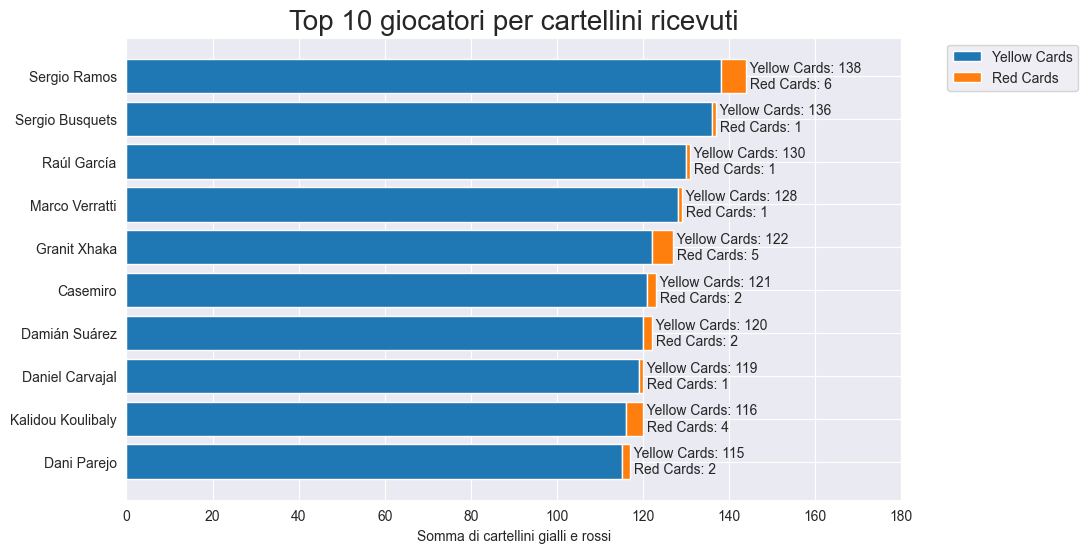

In [21]:
# giocatori con il maggior numero di ammonizioni e espulsioni

total_cards = appearances_df.groupby('player_id')[['yellow_cards', 'red_cards']].sum()

merged_data = pd.merge(total_cards, players_df, left_index=True, right_on='player_id')
merged_data['total_cards'] = merged_data['yellow_cards']+merged_data['red_cards']

top_cards = merged_data.nlargest(10, 'total_cards').sort_values(by='total_cards')

plt.figure(figsize=(10,6))
plt.barh(top_cards['name'], top_cards['yellow_cards'], label='Yellow Cards')
plt.barh(top_cards['name'], top_cards['red_cards'], label='Red Cards', left=top_cards['yellow_cards'])

for i, (yellows, reds, name) in enumerate(zip(top_cards['yellow_cards'], top_cards['red_cards'], top_cards['name'])):
    plt.text(yellows + reds, i, f' Yellow Cards: {yellows}\n Red Cards: {reds}', va='center')
    
plt.title('Top 10 giocatori per cartellini ricevuti', fontsize=20)
plt.xlabel('Somma di cartellini gialli e rossi')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,180)
plt.show()

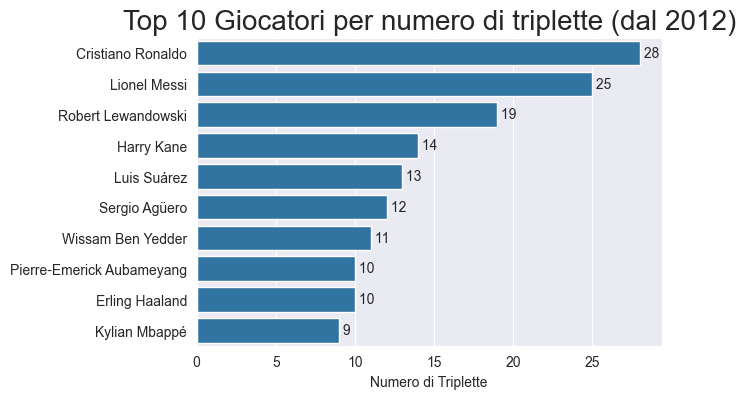

In [22]:
# giocatori con il maggior numero di triplette

hat_tricks = appearances_df.query('goals == 3')['player_id'].value_counts().head(10)
hat_tricks_df = pd.DataFrame({'player_id': hat_tricks.index, 'hat_tricks_count': hat_tricks.values})

merged_df = pd.merge(hat_tricks_df, players_df, on='player_id')


plt.figure(figsize=(6, 4))
sns.barplot(data=merged_df, y='name', x='hat_tricks_count')

for index, value in enumerate(merged_df['hat_tricks_count']):
    plt.text(value, index, f" {value}", ha='left', va='center')

plt.title('Top 10 Giocatori per numero di triplette (dal 2012)', fontsize=20)
plt.xlabel('Numero di Triplette')
plt.ylabel('')
plt.show()

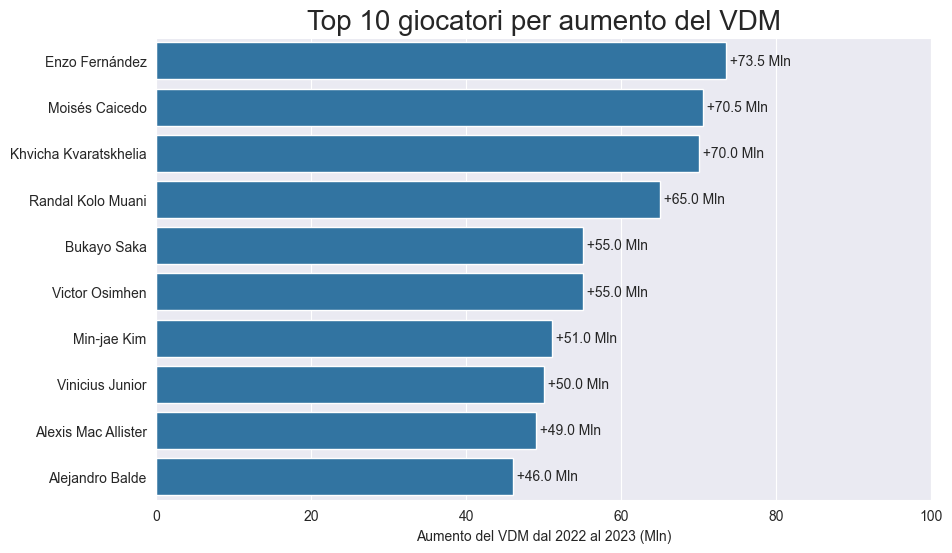

In [23]:
# top 10 giocatori per aumento del VDM

val_df['datetime'] = pd.to_datetime(val_df['datetime'])
val_df_22_23 = val_df[(val_df['datetime'].dt.year >= 2022) & (val_df['last_season'] == 2023)].sort_values(by='datetime')

diff = val_df_22_23.groupby('player_id')['market_value_mln'].agg(lambda x: x.iloc[-1] - x.iloc[0])
diff = diff.sort_values(ascending=False).head(10)

names = players_df.loc[players_df['player_id'].isin(diff.index), ['player_id', 'name']].set_index('player_id')

top10_df = pd.DataFrame({'Player': names.loc[diff.index, 'name'].values, 'Market Value Difference (Mln)': diff.values})


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_df, x='Market Value Difference (Mln)', y='Player')

for p in ax.patches:
    ax.annotate(f' +{p.get_width():.1f} Mln', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Top 10 giocatori per aumento del VDM', fontsize=20)
plt.xlabel('Aumento del VDM dal 2022 al 2023 (Mln)')
plt.ylabel('')
plt.xlim(0,100)
plt.show()

## Altre Statistiche Giocatori

Altre visualizzazioni sul singolo giocatore, per rappresentare ad esempio l'andamento del valore di mercato nel corso del tempo

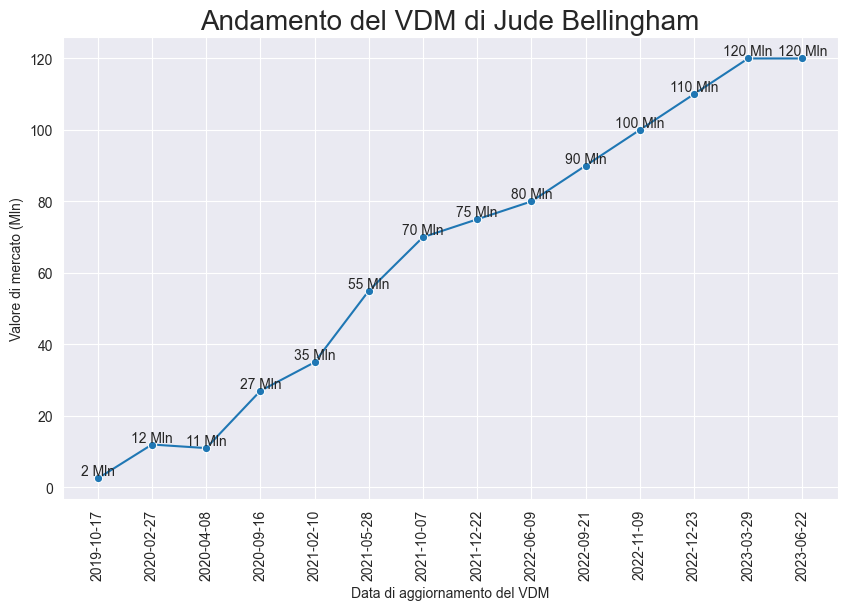

In [24]:
# andamento del VDM di un singolo giocatore

current_players = pd.read_feather('../cleaned_data/players.feather')

player_name = "Jude Bellingham"
selected_player = current_players.query(f'full_name == "{player_name}"')
player_id = selected_player.index[0]
market_value_evolution = val_df.query(f'player_id == {player_id}')


plt.figure(figsize=(10, 6))
sns.lineplot(data=market_value_evolution, x='date', y='market_value_mln', marker='o')

for i, row in market_value_evolution.iterrows():
    plt.text(row['date'], row['market_value_mln'], f'{row["market_value_mln"]:.0f} Mln', ha='center', va='bottom')

plt.title(f"Andamento del VDM di {player_name}", fontsize=20)
plt.xlabel('Data di aggiornamento del VDM')
plt.ylabel('Valore di mercato (Mln)')
plt.xticks(rotation=90)
plt.show()

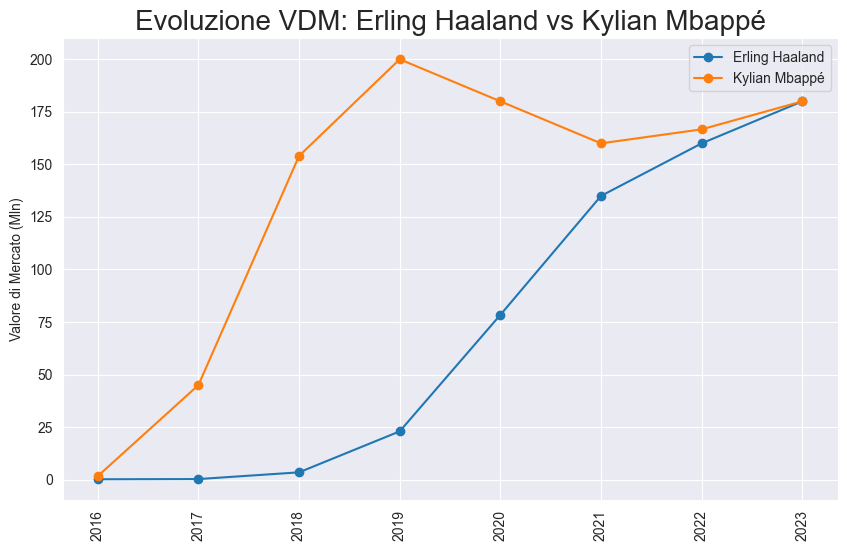

In [25]:
# confronto andamento VDM di 2 giocatori

# Selezionare due giocatori diversi
player1_name = "Erling Haaland"
player2_name = "Kylian Mbappé"

player1 = current_players.query(f'full_name == "{player1_name}"')
player2 = current_players.query(f'full_name == "{player2_name}"')

player1_id = player1.index[0]
player2_id = player2.index[0]

vdm_p1 = val_df.query(f'player_id == {player1_id}').sort_values(by='datetime')
vdm_p2 = val_df.query(f'player_id == {player2_id}').sort_values(by='datetime')

vdm_p1_year = vdm_p1.groupby(vdm_p1['datetime'].dt.to_period('Y'))['market_value_mln'].mean()
vdm_p2_year = vdm_p2.groupby(vdm_p2['datetime'].dt.to_period('Y'))['market_value_mln'].mean()

merged_data = pd.merge(vdm_p1_year, vdm_p2_year, left_index=True, right_index=True, suffixes=('_player1', '_player2')).sort_index()


plt.figure(figsize=(10, 6))
plt.plot(merged_data.index.astype(str), merged_data['market_value_mln_player1'], marker='o', label=f'{player1_name}')
plt.plot(merged_data.index.astype(str), merged_data['market_value_mln_player2'], marker='o', label=f'{player2_name}')

plt.title(f'Evoluzione VDM: {player1_name} vs {player2_name}', fontsize=20)
plt.xlabel('')
plt.ylabel('Valore di Mercato (Mln)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

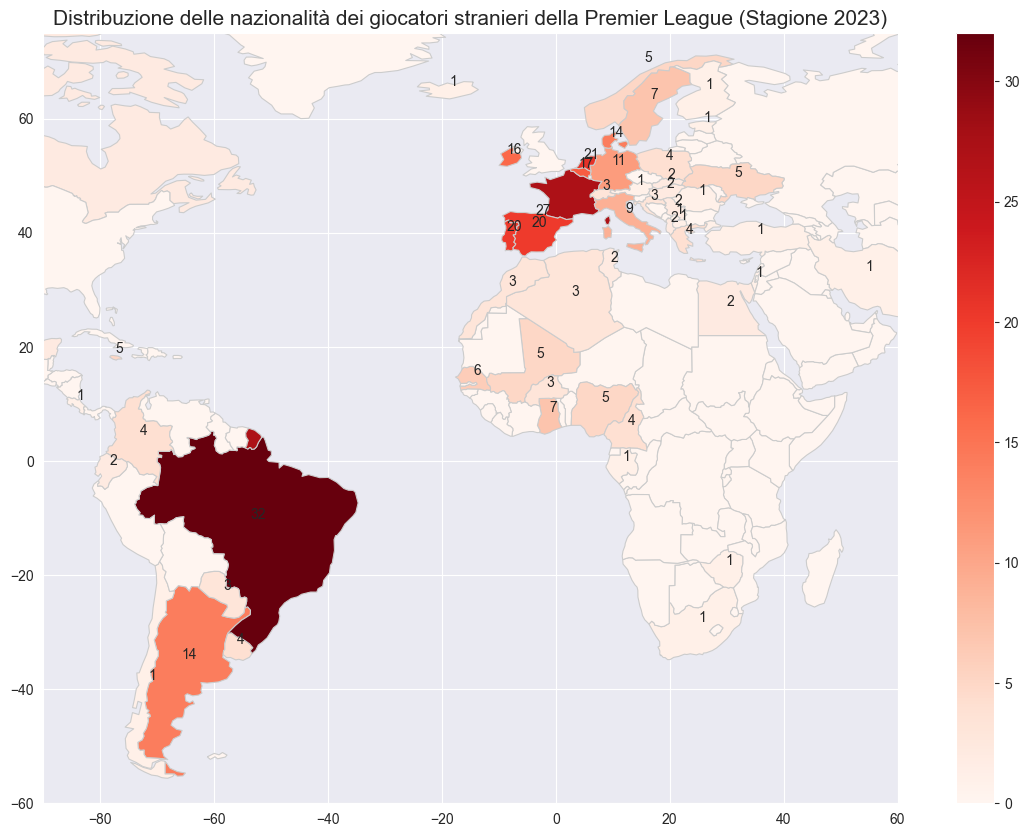

In [26]:
players_df = pd.read_feather("../cleaned_data/players.feather")

GB1_players_df= players_df[(players_df['league_id'] == 'GB1') & (players_df['last_season'] == 2023)]

nationality_counts = GB1_players_df['nationality'].value_counts()




# Carica il file shapefile (o GeoJSON) dei confini delle nazioni
world_players = gpd.read_file("../geographic_data/ne_110m_admin_0_countries.shp")

# Filtra il dataframe dei confini per le nazioni presenti nei dati dei giocatori
countries = world_players[world_players['NAME'].isin(nationality_counts.index)]


world_players = world_players.set_index('NAME')
world_players['counts'] = world_players.index.map(nationality_counts).fillna(0)

# Prepara il grafico
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Disegna la mappa utilizzando un colormap graduale per il numero di giocatori
world_players.plot(column='counts', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds= {
    "color": "lightgrey",
    "edgecolor": "white",
    "hatch": "///",
    "label": "No data"
})


for idx, row in world_players.iterrows():
    # Trova il centroide di ciascuno stato
    centroid = row['geometry'].centroid
    # Estrai il numero di giocatori per lo stato corrente
    num_players = int(row['counts'])
    # Aggiungi il testo con il numero di giocatori al centro dello stato
    if num_players > 0: 
        ax.annotate(text=num_players, xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords="offset points", fontsize=10, ha='center')


# Aggiungi un titolo
ax.set_title('Distribuzione delle nazionalità dei giocatori stranieri della Premier League (Stagione 2023)', fontdict={'fontsize': '15', 'fontweight' : '3'})

ax.set_xlim(-90, 60)
ax.set_ylim(-60, 75)

# Mostra il grafico
plt.show()

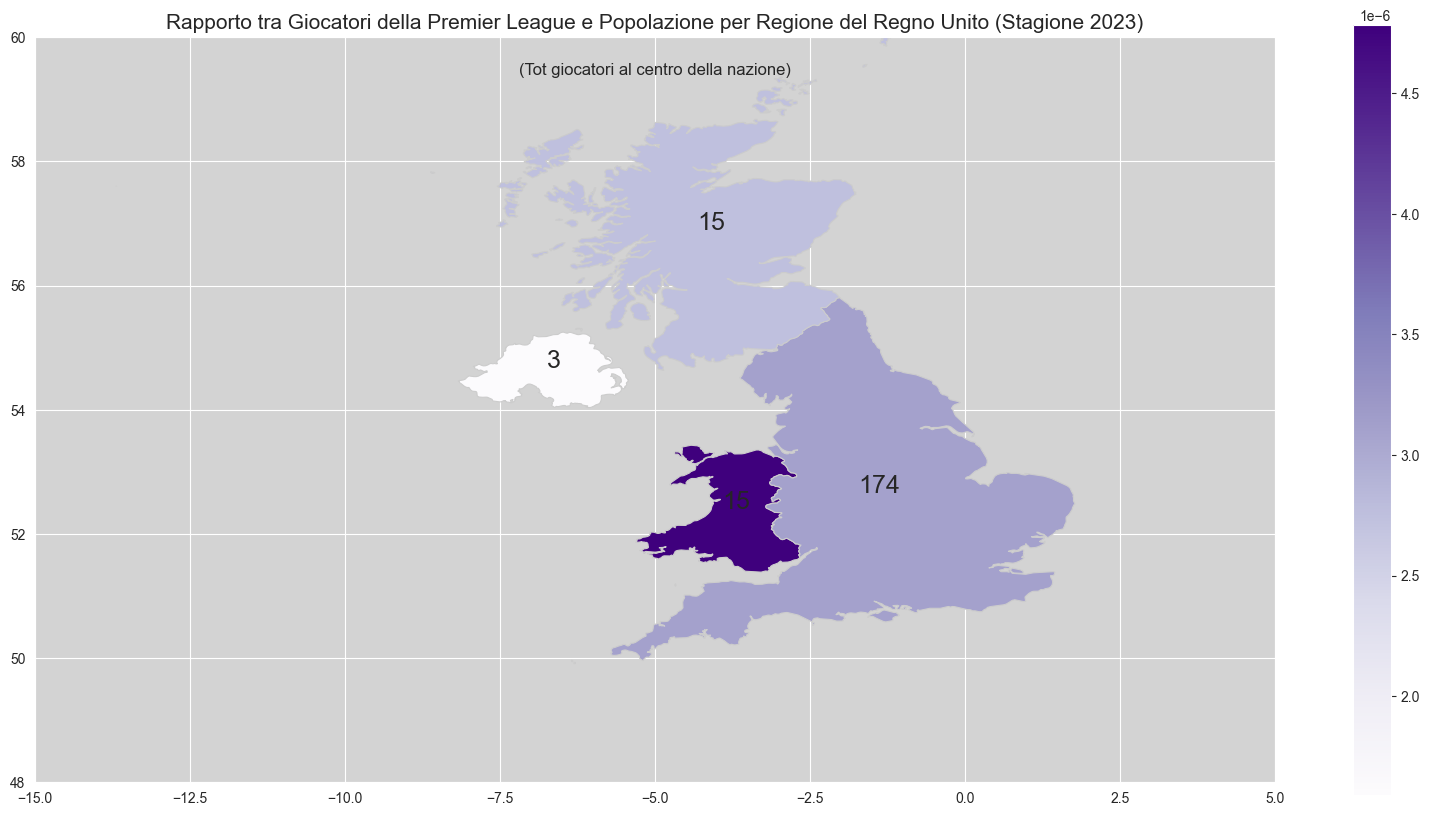

In [27]:

# Carica il file shapefile
england = gpd.read_file("../geographic_data/ne_10m_admin_0_map_units.shp")

# Popolazione delle regioni
populations = {
    'England': 55980000,
    'Scotland': 5454000,
    'Wales': 3136000,
    'Northern Ireland': 1885000
}

# Filtra i giocatori per nazionalità UK
GB1_uk_players = GB1_players_df[GB1_players_df['nationality'].isin(uk_nationalities)]
nationality_counts_uk = GB1_uk_players['nationality'].value_counts()

# Filtra le regioni nel shapefile
countries = england[england['GEOUNIT'].isin(nationality_counts_uk.index)]

# Imposta l'indice del dataframe
england = england.set_index('GEOUNIT')

# Aggiungi i counts al dataframe
england['counts'] = england.index.map(nationality_counts_uk).fillna(0)

# Aggiungi la popolazione al dataframe
england['population'] = england.index.map(populations)

# Calcola il rapporto tra counts e popolazione
england['ratio'] = england['counts'] / england['population']

# Prepara il grafico
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Disegna la mappa utilizzando un colormap graduale per il rapporto giocatori/popolazione
england.plot(column='ratio', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in england.iterrows():
    # Trova il centroide di ciascuno stato
    centroid = row['geometry'].centroid
    # Estrai il numero di giocatori per lo stato corrente
    num_players = int(row['counts'])
    # Aggiungi il testo con il numero di giocatori al centro dello stato
    if num_players > 0: 
        ax.annotate(text=num_players, xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords="offset points", fontsize=18, ha='center')

ax.set_facecolor('lightgrey')

# Aggiungi un titolo
ax.set_title('Rapporto tra Giocatori della Premier League e Popolazione per Regione del Regno Unito (Stagione 2023)', fontdict={'fontsize': '15', 'fontweight' : '3'})

ax.text(0.5, 0.95, '(Tot giocatori al centro della nazione)', fontsize=12, ha='center', transform=ax.transAxes)


ax.set_xlim(-15, 5)
ax.set_ylim(48, 60)

# Mostra il grafico
plt.show()
